[0.00000e+00 1.54919e-06 3.09839e-06 ... 1.54915e-01 1.54916e-01
 1.54918e-01]
[-0.55144573 -0.55154573 -0.55154573 ...  0.55164573  0.55154573
  0.55154573]


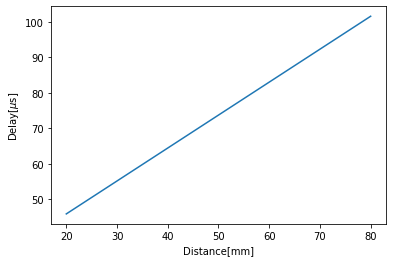

In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy
import math

distance = genfromtxt('data/distance_vector.csv', delimiter=',')
distance_mm = distance*1000
gain = genfromtxt('data/gain_vector.csv', delimiter=',')
gain_interpolated = -20 * numpy.log10(gain)


delay = genfromtxt('data/delay_vector.csv', delimiter=',')
fir_fs = 5.0000e+06
delay_interpolated = delay * (1/fir_fs) * (10**(6))

time = genfromtxt('data/time.csv', delimiter=',')[:-1]

print(time)
doppler_factor = genfromtxt('data/doppler_factor.csv', delimiter=',')[:-1]


doppler_factor_pi = (doppler_factor %(2 * math.pi)) -math.pi
print(doppler_factor_pi)
 
# print(gain)
# print(delay)

plt.plot(distance_mm,delay_interpolated)
plt.xlabel("Distance[mm]")
plt.ylabel("Delay[$\mu$s]")
plt.savefig('plots/valdidation_ultrasound_Distance_Delay.pdf')
plt.savefig('plots/valdidation_ultrasound_Distance_Delay.png')


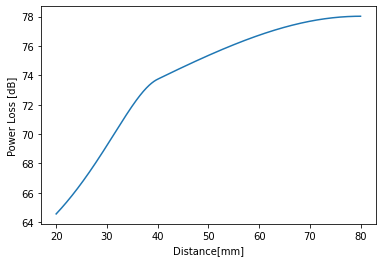

In [2]:
plt.plot(distance_mm, gain_interpolated)
plt.xlabel("Distance[mm]")
plt.ylabel("Power Loss [dB]")
plt.savefig('plots/valdidation_ultrasound_Distance_PowerLoss.pdf')
plt.savefig('plots/valdidation_ultrasound_Distance_PowerLoss.png')

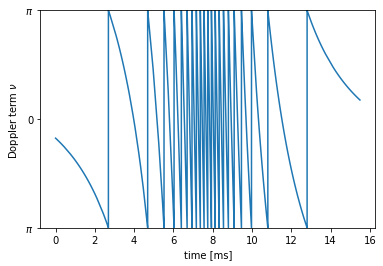

In [3]:
plt.plot(time *100, doppler_factor_pi)
plt.xlabel("time [ms]")
plt.ylabel("Doppler term $\\nu$")
plt.ylim(-math.pi, math.pi)
tick_pos= [-math.pi ,0,  math.pi]
yticks = ['$\\pi$', '0', '$\\pi$']
plt.yticks(tick_pos, yticks)

plt.savefig('plots/valdidation_ultrasound_Time_Doppler.pdf')
plt.savefig('plots/valdidation_ultrasound_Time_Doppler.png')